In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
protocol = "sqlite"
db = "hawaii.sqlite"
connection_string = f'{protocol}:///{db}'
engine = create_engine(connection_string)
data = engine.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
print("Connected!\n")
print("Tables in Database:")
for table in data:
    print(table)
    table_info = engine.execute(f"pragma table_info({table[0]})")
    for column in table_info:
        print(column)
    print('\n')

Connected!

Tables in Database:
('measurement',)
(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'date', 'TEXT', 0, None, 0)
(3, 'prcp', 'FLOAT', 0, None, 0)
(4, 'tobs', 'FLOAT', 0, None, 0)


('station',)
(0, 'id', 'INTEGER', 1, None, 1)
(1, 'station', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'latitude', 'FLOAT', 0, None, 0)
(4, 'longitude', 'FLOAT', 0, None, 0)
(5, 'elevation', 'FLOAT', 0, None, 0)




In [10]:
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
#print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

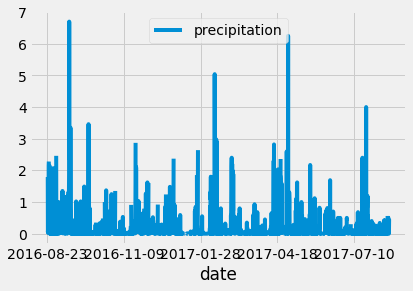

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [15]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [17]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
print(results)

[(77.0,), (77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,), (80.0,), (78.0,), (78.0,), (78.0,), (73.0,), (74.0,), (80.0,), (79.0,), (77.0,), (80.0,), (76.0,), (79.0,), (75.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (76.0,), (74.0,), (77.0,), (78.0,), (79.0,), (79.0,), (77.0,), (80.0,), (78.0,), (78.0,), (78.0,), (77.0,), (79.0,), (79.0,), (79.0,), (79.0,), (75.0,), (76.0,), (73.0,), (72.0,), (71.0,), (77.0,), (79.0,), (78.0,), (79.0,), (77.0,), (79.0,), (77.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (74.0,), (75.0,), (76.0,), (73.0,), (76.0,), (74.0,), (77.0,), (76.0,), (76.0,), (74.0,), (75.0,), (75.0,), (75.0,), (75.0,), (71.0,), (63.0,), (70.0,), (68.0,), (67.0,), (77.0,), (74.0,), (77.0,), (76.0,), (76.0,), (75.0,), (76.0,), (75.0,), (73.0,), (75.0,), (73.0,), (75.0,), (74.0,), (75.0,), (74.0,), (75.0,), (73.0,), (75.0,), (73.0,), (73.0,), (74.0,), (70.0,), (72.0,), (70.0,), (67.0,), (67.0,), (69.0,), (70.0,), (68.0,), (69.0,), (69.0,), 

In [18]:
df = pd.DataFrame(results, columns=['tobs'])
print(df)

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


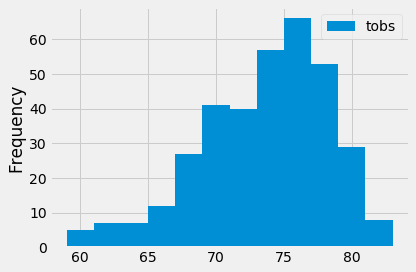

In [19]:
df.plot.hist(bins=12)
plt.tight_layout()

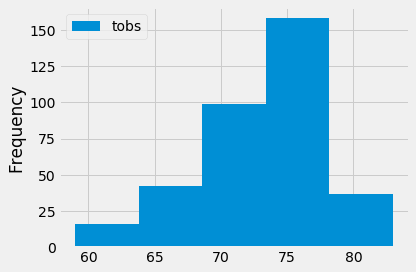

In [20]:
df.plot.hist(bins=5)
plt.tight_layout()

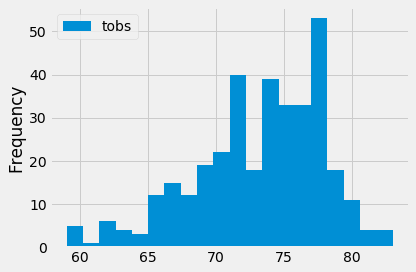

In [21]:
df.plot.hist(bins=20)
plt.tight_layout()

In [22]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# December and June Temps
print(calc_temps('2016-12-01', '2016-12-31'))
print(calc_temps('2017-06-01', '2017-06-30'))

[(60.0, 71.13, 78.0)]
[(71.0, 77.21989528795811, 83.0)]


# Challenge

In [23]:
#June trip dates and previous dates
June_trip = '2019-06-01 to \n 2019-06-30'
June_tripStartDate = '2017-06-01'
June_tripEndDate = '2017-06-30'

#calculate the tmin, tavg, and tmax 
June_tripTemps = calc_temps(June_tripStartDate, June_tripEndDate)

June_tripTemps

[(71.0, 77.21989528795811, 83.0)]

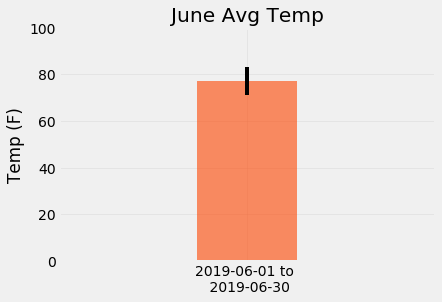

In [24]:
# June Temps

minTripTemp = June_tripTemps[0][0]
avgTripTemp = June_tripTemps[0][1]
maxTripTemp = June_tripTemps[0][2]

minError = avgTripTemp - minTripTemp
maxError = maxTripTemp - avgTripTemp

errorBars = np.array([[minError], [maxError]])

plt.bar(June_trip, avgTripTemp, yerr=errorBars, color = 'orangered', alpha = .6)
plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)
plt.title('June Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)

In [25]:
#December trip dates and previous dates
Dec_trip = '2018-12-01 to \n 2018-12-31'
Dec_tripStartDate = '2016-12-01'
Dec_tripEndDate = '2016-12-31'

#calculate the tmin, tavg, and tmax 
Dec_tripTemps = calc_temps(Dec_tripStartDate, Dec_tripEndDate)

Dec_tripTemps

[(60.0, 71.13, 78.0)]

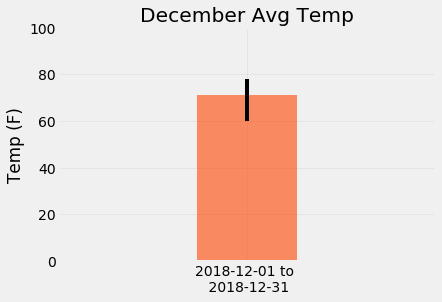

In [26]:
# December Temps

min_TripTemp = Dec_tripTemps[0][0]
avg_TripTemp = Dec_tripTemps[0][1]
max_TripTemp = Dec_tripTemps[0][2]

minError = avg_TripTemp - min_TripTemp
maxError = max_TripTemp - avg_TripTemp

errorBars = np.array([[minError], [maxError]])

plt.bar(Dec_trip, avg_TripTemp, yerr=errorBars, color = 'orangered', alpha = .6)
plt.ylim(0, 100)
plt.xlim(-1.5, 1.5)
plt.title('December Avg Temp')
plt.ylabel('Temp (F)')
plt.grid(alpha=.3)

In [30]:
#query for precipitation per station on June dates
sel = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp), 
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

June_stationRain = (session.query(*sel)
                   .filter(Station.station == Measurement.station)
                   .filter(Measurement.date >= June_tripStartDate)
                   .filter(Measurement.date <= June_tripEndDate)
                   .group_by(Station.station)
                   .order_by(func.sum(Measurement.prcp).desc())
                   .all())

In [35]:
#June Data frame
June_stationRain = pd.DataFrame(np.array(June_stationRain))

#rename columns
June_stationRain = June_stationRain.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})
June_stationRain

,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",9.299999999999997,21.3331,-157.8025,152.4
1,USC00519281,"WAIHEE 837.5, HI US",4.26,21.45167,-157.84888999999998,32.9
2,USC00513117,"KANEOHE 838.1, HI US",2.9799999999999995,21.4234,-157.8015,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2.6,21.5213,-157.8374,7.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",0.8900000000000001,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",0.37000000000000005,21.2716,-157.8168,3.0
6,USC00517948,"PEARL CITY, HI US",0.12,21.3934,-157.9751,11.9


In [36]:
#query for precipitation per station on December dates
sel = ([Station.station, 
        Station.name, 
        func.sum(Measurement.prcp), 
        Station.latitude, 
        Station.longitude, 
        Station.elevation
       ])

Dec_stationRain = (session.query(*sel)
                   .filter(Station.station == Measurement.station)
                   .filter(Measurement.date >= Dec_tripStartDate)
                   .filter(Measurement.date <= Dec_tripEndDate)
                   .group_by(Station.station)
                   .order_by(func.sum(Measurement.prcp).desc())
                   .all())

In [37]:
#December Data frame
Dec_stationRain = pd.DataFrame(np.array(Dec_stationRain))

#rename columns
Dec_stationRain = Dec_stationRain.rename(columns={0: "Station", 1: "Location", 
                                                    2: "Total Precipitation", 3: "Latitude", 
                                                    4: "Longitude", 5: "Elevation"})
Dec_stationRain

,Station,Location,Total Precipitation,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",16.91,21.3331,-157.8025,152.4
1,USC00519281,"WAIHEE 837.5, HI US",6.509999999999999,21.45167,-157.84888999999998,32.9
2,USC00513117,"KANEOHE 838.1, HI US",4.39,21.4234,-157.8015,14.6
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",3.32,21.5213,-157.8374,7.0
4,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2.28,21.33556,-157.71139,19.5
5,USC00519397,"WAIKIKI 717.2, HI US",1.7500000000000007,21.2716,-157.8168,3.0
6,USC00517948,"PEARL CITY, HI US",0.35000000000000003,21.3934,-157.9751,11.9


# Findings between June and December Data

In [38]:
# In reviewing the data for both June and December previous years findings there's not much difference in the weather.
# There's a slight difference in temperature minimum, average and maximum.
# Also in reviewing data across stations there's not much difference. This information can be of great value
# to the businesses as they are planning for business growth purposes as well as marketing to potential travelers as 
# they also seek information in planning a future trip.
# Other options to recommend as an analysis is reviewing businesses in the surrounding areas that also might impact
# incoming business to the surf and ice cream shop business, how do their sales compare based on the different seasons.
# Based on the location of the surf and ice cream shop can they measure success in comparisson to their competition? 